## Live Data Ploting
### With the code below we simulate a live API data source which would deliver our data
#### Basically we scrape the [marketwatch](https://www.marketwatch.com/investing/stock/tsla) website for the tesla stock every second and appending the new value to a csv file. With the same frequency we read the file and ploting the renewed data

In [1]:
# import needed libraries
import requests
from bs4 import BeautifulSoup
import os.path
import csv
from pandas import read_csv

In [2]:
# URL to scrape
url = 'https://www.marketwatch.com/investing/stock/tsla'
# file name to store
filename = 'tesla_stock_price.csv'

In [3]:
def get_live_data(url):
    try:
        # retreives the whole html doc
        request = requests.get(url)
    except requests.exceptions.RequestException as ex:
        raise SystemExit(ex)

    # and by using bs we find the desired value withing the html code
    soup = BeautifulSoup(request.text, 'html.parser')
    price = soup.find_all('div', {'class':'intraday__data'})[0].find('bg-quote').text
    
    return float(price)

In [4]:
# A good practice when dealing with live data is to first, store them to a file and parse them from there
# Here's a piece of code which can be combined for that purpose. 
def store_row_to_csv(filename, value):
    # check if file exists
    file_exists = os.path.isfile(filename)
    try:
        with open(filename, 'a+', encoding='utf-8', newline='') as csvfile:
            # desired header
            headers = ['price']
            # writer object
            writer = csv.DictWriter(csvfile, lineterminator='\n', fieldnames=headers)
            # file doesn't exist yet, write a header
            if not file_exists:
                writer.writeheader()
            # insert new value
            writer.writerow({'price': value})
    except:
        raise('File Error')  

In [5]:
# importing pyplot for the basic use
import matplotlib.pyplot as plt
%matplotlib notebook

# custom style
plt.style.use('seaborn')

# FuncAnimation will make our plot refresh in time while appending new values to the graph
from matplotlib.animation import FuncAnimation

In [6]:
def animate(i):
    # get and append data
    price = get_live_data(url)
    
    # store in file
    store_row_to_csv(filename, price)
    
    # load data
    y = read_csv(filename)
    
    # clear axis
    plt.cla()
    
    # plot data
    plt.plot(y['price'], label='Tesla Stock Price', linewidth=1.5)
    
    # apply fill
    # plt.fill_between(range(y.shape[0]), y['price'], alpha=0.2)
    
    # labeling
    plt.title('Tesla Stock Price')
    plt.xlabel('Time')
    plt.ylabel('Dollars (USD)')
    
    # legend
    plt.legend(loc='upper left')
    
    # fix padding
    plt.tight_layout()

<IPython.core.display.Javascript object>


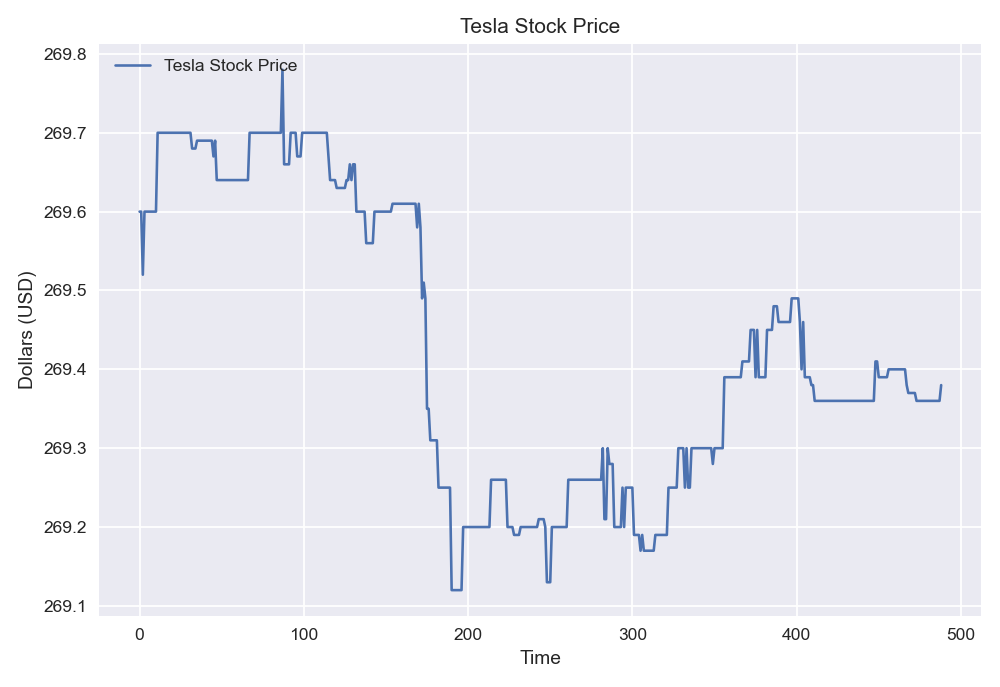

In [7]:
ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()